<a href="https://colab.research.google.com/github/srdarknighter/youtube-text-summarizer/blob/main/summarizer_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing pre-requisties and using pegasus model trained on cnn dataset

In [ ]:
!pip install transformers[sentencepiece] datasets py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found exist

In [ ]:
!pip install nltk

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from transformers import pipeline

In [ ]:
!pip install youtube-transcript-api
from youtube_transcript_api import YouTubeTranscriptApi
video_id = input("Enter the Youtube URL: ")
video_id = video_id.split("=")[1]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 8.3 MB/s eta 0:00:00


KeyboardInterrupt: Interrupted by user

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('punkt')
nltk.download('wordnet')

transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['en'])
full_transcript = ""
for i in transcript:
  words = nltk.word_tokenize(i['text'])
  words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
  full_transcript += ' '.join(words) + ' '

[nltk_data] Downloading package stopwords to /home/anirudh-s-
[nltk_data]     space/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/anirudh-s-
[nltk_data]     space/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/anirudh-s-
[nltk_data]     space/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anirudh-s-
[nltk_data]     space/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


"still lazing around I 'm trying call 're watching video might ambitious I applaud importantly watching video I 'm sure 're lazy as imagine 20 's Saturday evening 're chilling bed scrolling fancy car iits uh 1 CR CTC surely massive Bungalow suddenly slip dream drifting fast machine back full cash boot space riding massive Bungalow course childhood crushed side boom 're back bed looking dead fan nothing changed keep telling someday someday someday problem Bel shied curve expectation mismatch reality start sleeping dream backing plan motivation baseless step towards high peak adrenaline dopamine ecstasy soon 're start coming back pathetic reality current low middle class lifestyle plan motivation foundation actually achieve dream well procrastination way change boring fictional bell curve real strong stable exponential curve power desperately seek lie right core 're avoiding plan Implement integrate make every second count move yes fail often win feel shitty would want stop would want gi

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
# pipe = pipeline('summarization', model = 'google/pegasus-cnn_dailymail', device=0 if device=="cuda" else -1)

In [ ]:
pipe_out = ' '
for i in range(0, len(full_transcript)//1000+1):
  pipe_out += pipe(full_transcript[i*1000:(i+1)*1000], max_length = 80)[0]['summary_text'] + ' '

Your max_length is set to 80, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


In [ ]:
pipe_out

" Still mismatch around I 'm trying call 're watching video might ambitious I applaud importantly watching video I 'm sure 're lazy as imagine 20 's Saturday evening 're chilling bed scrolling fancy car .<n>Massive Bungalow suddenly slip dream drifting fast machine back full cash boot space riding massive Bungalow course childhood crushed side boom 're back bed looking dead fan nothing changed keep telling someday someday someday complacent moment weakness ask want old man death bed filled regret .<n>e would want complacent moment weakness ask want old man death bed filled regret .<n>e would want complacent moment weakness ask want old man death bed filled regret . "

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer


In [ ]:
# device = "gpu"
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
samsum =  load_dataset("samsum")

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

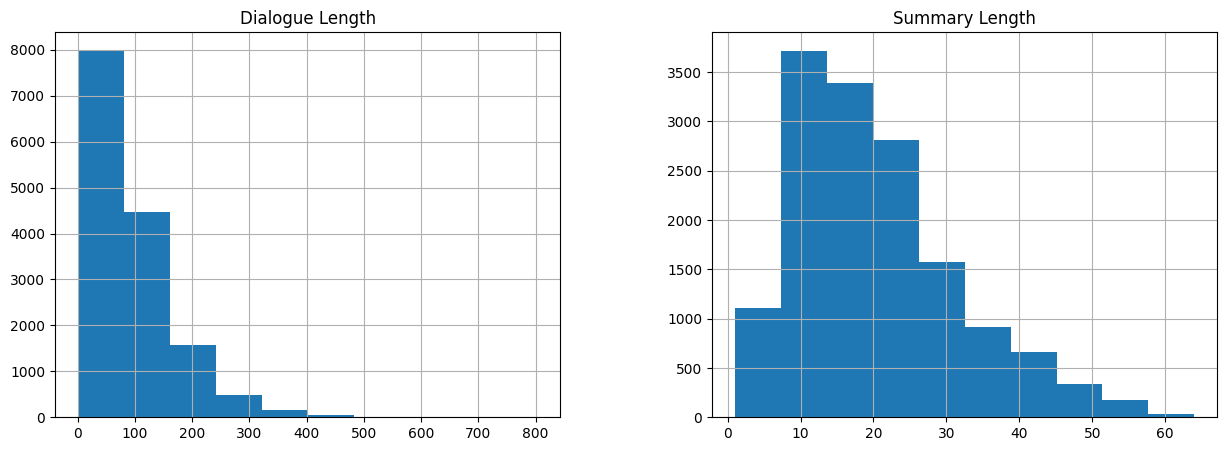

In [ ]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue Length', 'Summary Length']

data.hist(figsize=(15,5))

In [ ]:
def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

In [ ]:
samsum_pt = samsum.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [ ]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
!pip install accelerate

In [ ]:
!pip install transformers[torch]

In [ ]:
from transformers import TrainingArguments, Trainer

# ... (Your model, tokenizer, data_collator, and dataset loading code) ...

# 1. Check and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Move the model to the device *before* creating the Trainer
model.to(device)  # Crucial step

training_args = TrainingArguments(
    output_dir="pegasus_samsum",
    num_train_epochs=1,  # Adjust as needed
    per_device_train_batch_size=1,  # Start small
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,  # Simulate larger batch
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,  # Save frequently in Colab
    fp16=True,
    fp16_opt_level="O1",
    report_to="none",  # or "tensorboard"
    dataloader_num_workers = 0,
    learning_rate=5e-5,
    # optim="paged_adamw_8bit" #Use 8 bit optimizers to save memory.
)

trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator,
    train_dataset=samsum_pt['train'],
    eval_dataset=samsum_pt['validation']
)


trainer.train()

Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-8fa90ef8836c>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:657: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss
500,1.644200,1.591578
1000,1.740800,1.505881
1500,1.386800,1.473210
2000,1.339300,1.450273
2500,1.654300,1.436245
3000,1.387600,1.424302
3500,1.358100,1.420520


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=3683, training_loss=1.659827031941638, metrics={'train_runtime': 4048.7515, 'train_samples_per_second': 3.639, 'train_steps_per_second': 0.91, 'total_flos': 5531718781673472.0, 'train_loss': 1.659827031941638, 'epoch': 1.0})

In [ ]:
trainer.save_model('pegasus_samsum_model')

In [ ]:
!zip pegasus_samsum.zip -r pegasus_samsum_model/

  adding: pegasus_samsum_model/ (stored 0%)
  adding: pegasus_samsum_model/special_tokens_map.json (deflated 82%)
  adding: pegasus_samsum_model/config.json (deflated 61%)
  adding: pegasus_samsum_model/model.safetensors (deflated 7%)
  adding: pegasus_samsum_model/training_args.bin (deflated 51%)
  adding: pegasus_samsum_model/generation_config.json (deflated 44%)
  adding: pegasus_samsum_model/tokenizer.json (deflated 78%)
  adding: pegasus_samsum_model/tokenizer_config.json (deflated 94%)
  adding: pegasus_samsum_model/spiece.model (deflated 50%)


In [ ]:
!unzip pegasus_samsum.zip

unzip:  cannot find or open pegasus_samsum.zip, pegasus_samsum.zip.zip or pegasus_samsum.zip.ZIP.


In [ ]:
from datasets import load_dataset
dataset = load_dataset("seanfu112/youtube_video_summaries")

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

nlp_dataset.csv:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/558 [00:00<?, ? examples/s]

Streamlit instance

In [8]:
!pip install streamlit
import streamlit as st
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
!pip install youtube-transcript-api
from transformers import pipeline
@st.cache_resource
def load_model():
  tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
  model_path = '/content/drive/MyDrive/models/model_weights.pth'
  model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")
  model.load_state_dict(torch.load(model_path))
  return model, tokenizer

model, tokenizer = load_model()

st.title("Youtube Video Summarizer")


from youtube_transcript_api import YouTubeTranscriptApi
video_id = input("Enter the Youtube URL: ")
video_id = video_id.split("=")[1]
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['en'])

if st.button("Summarize"):
  pipe = pipeline('summarization', model = model, tokenizer = tokenizer)
  pipe_out = ' '
  for i in range(0, len(transcript)//1000+1):
    chunk = transcript[i * 1000:(i + 1) * 1000]
    summary = pipe(chunk, max_length=80, min_length=20, num_beams=4)
    pipe_out += summary + ' '
  st.write("**Summary: **",pipe_out)

2024-12-25 07:02:17.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 07:02:17.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Enter the Youtube URL: https://www.youtube.com/watch?v=DuBrreMiZlA


2024-12-25 07:02:22.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 07:02:22.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 07:02:22.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 07:02:22.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 07:02:22.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [9]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
train_data = dataset['train']

In [ ]:
!unzip pegasus_samsum.zip
!mkdir extracted_model

Archive:  pegasus_samsum.zip
   creating: pegasus_samsum_model/
  inflating: pegasus_samsum_model/special_tokens_map.json  
  inflating: pegasus_samsum_model/config.json  
  inflating: pegasus_samsum_model/model.safetensors  
  inflating: pegasus_samsum_model/training_args.bin  
  inflating: pegasus_samsum_model/generation_config.json  
  inflating: pegasus_samsum_model/tokenizer.json  
  inflating: pegasus_samsum_model/tokenizer_config.json  
  inflating: pegasus_samsum_model/spiece.model  
unzip:  cannot find or open pegasus_samsum/pegasus_samsum_model.zip, pegasus_samsum/pegasus_samsum_model.zip.zip or pegasus_samsum/pegasus_samsum_model.zip.ZIP.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import transformers
from transformers import AutoModelForSeq2SeqLM
model_path = '/content/drive/MyDrive/models/model_weights.pth'
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")
model.load_state_dict(torch.load(model_path))

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

<ipython-input-11-225fdd8da4f9>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [ ]:
import torch
model = torch.load('pegasus_samsum_model/training_args.bin')
# Assuming 'model' is your trained PyTorch model
model_save_path = '/content/drive/MyDrive/saved_models'  # Adjust this path as necessary

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)


model = torch.load('extracted_model/pegasus_samsum_model')

<ipython-input-28-5599ae424e8f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('pegasus_samsum_model/training_args.bin')


AttributeError: 'TrainingArguments' object has no attribute 'state_dict'

In [ ]:
import torch
import transformers
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained('pegasus_samsum_model')


model_save_path = '/content/drive/MyDrive/model_inception.hdf5'

torch.save(model.state_dict(), model_save_path)

In [ ]:
import nltk
from transformers import AutoTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

generated_summary = []
reference_summary = []
full_transcript = " "
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
pipe = pipeline('summarization', model = model, tokenizer = tokenizer)
for transcript in train_data['chunks'][:10]:
  # words = nltk.word_tokenize(transcript)
  # words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
  # full_transcript = ' '.join(words)
  full_transcript = transcript
  # print(full_transcript)
  #pass the full_transcript to the model and get the output

  pipe_out = ' '
  for i in range(0, len(full_transcript)//1000+1):
    chunk = full_transcript[i * 1000:(i + 1) * 1000]
    summary = pipe(chunk, max_length=80, min_length=20, num_beams=4)[0]['summary_text']
    pipe_out += summary + ' '
  generated_summary.append(pipe_out.strip())
  reference_summary.append(train_data['summary'][len(generated_summary)-1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Device set to use cuda:0


A ruthless murder was committed. Someone killed the dinosaurs and we have the murderer. Witnesses say that an Everest-sized asteroid hit Earth, devastated the planet and caused a mass extinction. A simple, fascinating and convincing explanation. Or… is it? In the last few years, new evidence has reinvigorated an older theory, pointing at a second suspect: A very slow and liquid asteroid 1000 times bigger, hitting earth on the opposite side of the planet. Like the true crime channel we are, let's look at the new evidence and tell a different story that could change everything we thought we knew… The Last Days of a Kingdom. 66 million years ago, Earth was barely recognizable. It was the last days of the Cretaceous, one of the hottest periods in Earth’s history and much more humid. Lush jungles and woodlands covered much of the planet. Even the polar regions were home to forests of prehistoric pines and ferns, Amazing ecosystems that were robust enough to survive the many months of darkne

Your max_length is set to 80, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


so, after the initial warming, a period of cooling followed, massively stressing the ecosystems that barely managed to adapt to the hotter temperatures. At the same time, the sulfur in the atmosphere came back down as acid rain, while the CO2 was acidifying the oceans and killing the plankton – which was, and still is today, the basis of the food web in the oceans. And if plankton disappears, a massive extinction is all but guaranteed. But now the grand finale was about to begin. About 50,000 years before impact, the true apocalypse came Like a cosmic horror breaking out of its prison, the Deccan Traps roared and screamed and began to spew out tens of trillions of tons of magma and even more deadly gasses, in an onslaught that lasted for several thousand years, Rolling over ecosystems, devastating everything they reached For a time as long as all of human civilization. this lava armageddon brought massive wildfires, Earthquakes and tsunamis, smashed and shook the continent. So much hea

Your max_length is set to 80, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


A finite universe means that if you want to fill it with ice cream, you can do it. You need a lot of ice cream, but it is a finite amount. But that leads to a weird problem. Such a universe should have an edge, a cosmic wall where space ends. And if there is an edge, there should be something outside that edge. But the universe by definition is “all there is”, so how could there be stuff outside all there is? Does the idea of something outside of everything even make sense? Except, of course, there is a physics hack. You can have a universe that has no border, but that still could be filled with a finite amount of ice cream. What if the universe is truly finite? Imagine an orange and a really tiny ant. The ant can only see a small piece of the skin – just as you can only see a small chunk of the universe. But if the ant starts walking, it will eventually walk around the whole orange and be back to its starting point. So the skin of an orange is not infinite – but it doesn’t have a bord

Your max_length is set to 80, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


In [ ]:
train_data['chunks'][:10][0]

"A ruthless murder was committed. Someone killed the dinosaurs and we have the murderer. Witnesses say that an Everest-sized asteroid hit Earth, devastated the planet and caused a mass extinction. A simple, fascinating and convincing explanation. Or… is it? In the last few years, new evidence has reinvigorated an older theory, pointing at a second suspect: A very slow and liquid asteroid 1000 times bigger, hitting earth on the opposite side of the planet. Like the true crime channel we are, let's look at the new evidence and tell a different story that could change everything we thought we knew… The Last Days of a Kingdom. 66 million years ago, Earth was barely recognizable. It was the last days of the Cretaceous, one of the hottest periods in Earth’s history and much more humid. Lush jungles and woodlands covered much of the planet. Even the polar regions were home to forests of prehistoric pines and ferns, Amazing ecosystems that were robust enough to survive the many months of darkn

In [ ]:
generated_summary

["Witnesses say that an Everest-sized asteroid hit Earth, devastated the planet and caused a mass extinction. In the last few years, new evidence has reinvigorated an older theory. Let's look at the new evidence and tell a different story that could change everything we thought we knew. The dinosaurs disappeared in a split-second of geological time after a big asteroid hit Earth 150 million years ago.",
 'The Deccan Traps spewed 10 million tonnes of CO2 and sulfur dioxide each year. 300,000 years before the asteroid, the Deccan Traps started to vomit lava. The Deccan Traps would not stop spewing lava. The planet experienced a wave of heating, with oceans getting at least 2oC hotter in just 100,000 years. Some of the gasses of the Deccan Traps heated the planet up, while others cooled it down, but the mix was uneven.',
 'After the initial warming, a period of cooling followed. The sulfur in the atmosphere came back down as acid rain, while the CO2 was acidifying the oceans and killing t

In [ ]:
reference_summary

['66 million years ago, Earth was barely recognizable. Pterosaurs filled the skies, marine lizards and long necked monsters up to 15 meters swam in the oceans. Everything larger than one meter was a dinosaur – one of the most successful animals ever to walk Earth. All these majestic creatures vanished in a split-second of geological time.',
 'About 800,000 years before the asteroid impact, the Deccan Traps began to exhale about 10 million tonnes of CO2 and sulfur dioxide each year. For half a million years they started to dangerously pile up in the atmosphere. After hundreds of thousands of years of never ending volcanic emissions, the catastrophe became global.',
 'After the initial warming, a period of cooling followed, massively stressing the ecosystems that barely managed to adapt to the hotter temperatures. At the same time, the sulfur in the atmosphere came back down as acid rain, while the CO2 was acidifying the oceans. And if plankton disappears, a massive extinction is all but

In [ ]:
generated_summary[0]

"Witnesses say that an Everest-sized asteroid hit Earth, devastated the planet and caused a mass extinction. In the last few years, new evidence has reinvigorated an older theory. Let's look at the new evidence and tell a different story that could change everything we thought we knew. The dinosaurs disappeared in a split-second of geological time after a big asteroid hit Earth 150 million years ago."

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install rouge-score
import pandas as pd
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rogueL' ,'rougeLsum'], use_stemmer=True)

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL' ,'rougeLsum'], use_stemmer=True)
results = []

for i in range(10):
    scores = scorer.score(reference_summary[i], generated_summary[i])
    results.append({
        'rouge1_precision': scores['rouge1'].precision,
        'rouge1_recall': scores['rouge1'].recall,
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_precision': scores['rouge2'].precision,
        'rouge2_recall': scores['rouge2'].recall,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_precision': scores['rougeL'].precision,
        'rougeL_recall': scores['rougeL'].recall,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
        'rougeLsum_precision': scores['rougeLsum'].precision,
        'rougeLsum_recall': scores['rougeLsum'].recall,
        'rougeLsum_fmeasure': scores['rougeLsum'].fmeasure,
    })

In [ ]:
results

[{'rouge1_precision': 0.2898550724637681,
  'rouge1_recall': 0.35714285714285715,
  'rouge1_fmeasure': 0.32,
  'rouge2_precision': 0.1323529411764706,
  'rouge2_recall': 0.16363636363636364,
  'rouge2_fmeasure': 0.1463414634146341,
  'rougeL_precision': 0.2028985507246377,
  'rougeL_recall': 0.25,
  'rougeL_fmeasure': 0.224,
  'rougeLsum_precision': 0.2028985507246377,
  'rougeLsum_recall': 0.25,
  'rougeLsum_fmeasure': 0.224},
 {'rouge1_precision': 0.3815789473684211,
  'rouge1_recall': 0.5370370370370371,
  'rouge1_fmeasure': 0.4461538461538461,
  'rouge2_precision': 0.21333333333333335,
  'rouge2_recall': 0.3018867924528302,
  'rouge2_fmeasure': 0.25,
  'rougeL_precision': 0.27631578947368424,
  'rougeL_recall': 0.3888888888888889,
  'rougeL_fmeasure': 0.3230769230769231,
  'rougeLsum_precision': 0.27631578947368424,
  'rougeLsum_recall': 0.3888888888888889,
  'rougeLsum_fmeasure': 0.3230769230769231},
 {'rouge1_precision': 0.2876712328767123,
  'rouge1_recall': 0.6461538461538462,


A good ROUGE score varies by summarization task and metric. ROUGE-1 scores are excellent around 0.5, with scores above 0.5 considered good and 0.4 to 0.5 moderate. For ROUGE-2, scores above 0.4 are good, and 0.2 to 0.4 are moderate. ROUGE-L scores are good around 0.4 and low at 0.3 to 0.4.


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
average_scores = results_df.mean()
print("Average ROUGE Scores:")
print(average_scores)

Average ROUGE Scores:
rouge1_precision       0.428812
rouge1_recall          0.454502
rouge1_fmeasure        0.426037
rouge2_precision       0.257454
rouge2_recall          0.276373
rouge2_fmeasure        0.255894
rougeL_precision       0.327036
rougeL_recall          0.346487
rougeL_fmeasure        0.324218
rougeLsum_precision    0.327036
rougeLsum_recall       0.346487
rougeLsum_fmeasure     0.324218
dtype: float64
